### prereqs

In [80]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6
!pip install netCDF4


Reading package lists... Done
^C
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
ERROR: Operation cancelled by user
ERROR: Operation cancelled by user


In [ ]:
from pylab import *

In [ ]:
pip install global-land-mask

     |████████████████████████████████| 1.8MB 4.2MB/s 


#Differential Equation Model Improvement

In [322]:
#Improved ODE Model


a=139.065
b=0.889
c=0.856
j=0.25
l=1
g=100
w0=10

area=2000
initialdensity=20 # x deer/square km
p0=area*initialdensity
v0=1
ecap=p0/v0
k=119040


fe=k/1000 #flight energy requirement is a hundredth of a deer

run_time = int(20/h)

metabolism = 0


def initialize():
    global w, p, v, w_result, p_result, v_result, t_list, metabolism_result, f_result
    w = w0 # weight
    p = p0 # prey level
    v = v0 # vegetation level
    t_list=[0]
    
    w_result = [w]
    p_result = [p]
    v_result = [v]
    metabolism_result = [a*w**b*365]
    f_result=[0]

def observe():
    global w, p, v, f, w_result, p_result, v_result, t, t_list, f_result

    w_result.append(w)
    p_result.append(p)
    v_result.append(v)
    metabolism_result.append(metabolism)
    t_list.append(t*h)
    f_result.append(f)
    
def update():
    global w, p, v, f, metabolism, w_result, p_result, v_result, t


    # f=k*(p/ecap)/(1+p/(ecap*w))*w**b*5

    #type 2 functional response model
    h_time = 2.7
    a_rate = 10*365
    f=k*(a_rate*p/area)/(1+a_rate*h_time*p/area)*w #type 2 functional response

    #average distance between two deer (approximate)
    d=2*math.sqrt(area/(2*math.pi*p))

    #energy required to eat f/k deer
    energy = d * w * f/k * fe

    metabolism=a*w**b*365+energy #metabolism is the sum of the base metabolic rate
                             #and how much energy it takes to capture the prey

    if (f-metabolism<0):
      nextw=w
    else:
      #nextw = w + (vmax*(1-math.exp(-c2*(f-a*w**b)/k))) * h 
      nextw = w + (f-metabolism)/(6000) * h #all extra energy goes to growth

    cap=v*ecap

    nextp = p + (j*(1-p/cap)*p-f/k) * h
    if (nextp<0):
      nextp=0.001
    if (v>1):
      nextv=1
    else:
      nextv = v + (l*v*(1-v)*area-g*w*v/area) * h
    
    if(nextv>1):
      nextv=1

    w, p, v = nextw, nextp, nextv
    
initialize()

for t in range(run_time):
    update()
    observe()
    if(p==0):
      break;

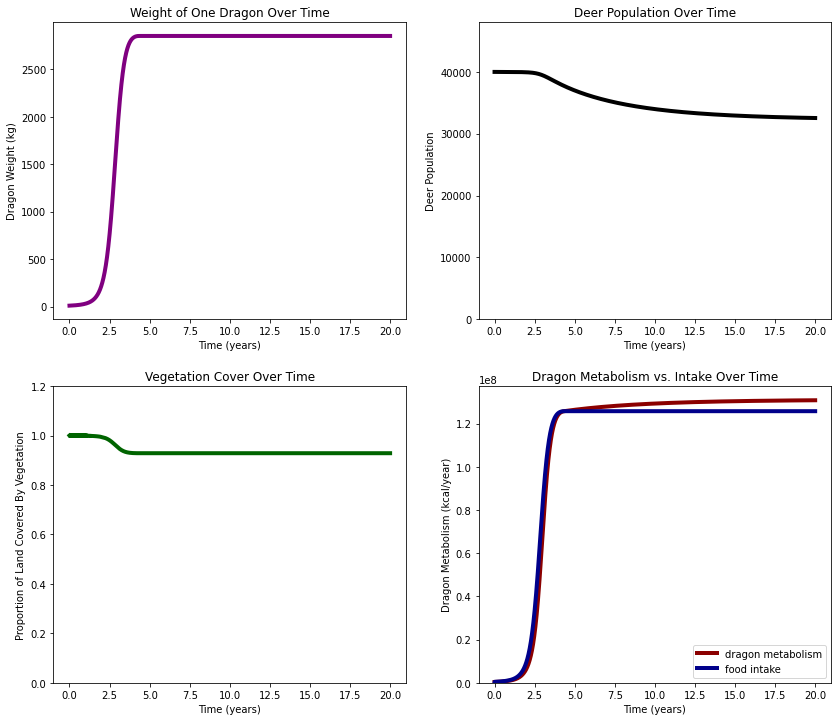

30.702906393207414


In [323]:
plt.figure(figsize=(12,15))

plt.subplot(3, 2, 1)
plot(t_list,w_result, color='purple',label='dragon weight',linewidth=4)
plt.xlabel("Time (years)")
plt.ylabel("Dragon Weight (kg)")
#legend(loc='upper right')
title('Weight of One Dragon Over Time')

plt.subplot(3, 2, 2)
plot(t_list,p_result, color='black',label='deer population', linewidth=4)
plt.xlabel("Time (years)")
plt.ylabel("Deer Population")
plt.ylim(0,p0*1.2)
#legend(loc='upper right')
title('Deer Population Over Time')

plt.subplot(3, 2, 3)
plot(t_list,v_result, color='darkgreen',label='dragon weight',linewidth=4)
plt.xlabel("Time (years)")
plt.ylabel("Proportion of Land Covered By Vegetation")
plt.ylim(0,1.2)
#legend(loc='upper right')
title('Vegetation Cover Over Time')

plt.subplot(3, 2, 4)
plot(t_list,metabolism_result, color='darkred',label='dragon metabolism',linewidth=4)
plot(t_list,f_result, color='darkblue',label='food intake',linewidth=4)
plt.xlabel("Time (years)")
plt.ylabel("Dragon Metabolism (kcal/year)")
legend(loc='lower right')
plt.ylim(0)
title('Dragon Metabolism vs. Intake Over Time')

plt.tight_layout(2) 
show()
print(w_result[int(1/h)])

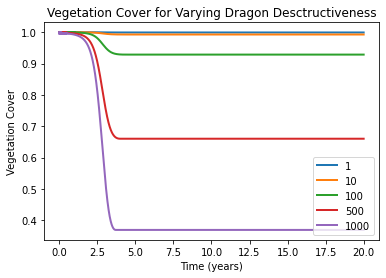

In [324]:
grange = [1, 10, 100, 500, 1000]
for g in grange:
  
  initialize()
  for t in range(run_time):
      update()
      observe()
  
  plot(t_list,v_result,label='{:0.0f}'.format(g),linewidth=2)
  plt.xlabel("Time (years)")
  plt.ylabel("Vegetation Cover")
  legend(loc='lower right')
  title('Vegetation Cover for Varying Dragon Desctructiveness')

show()

g=100

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes cu

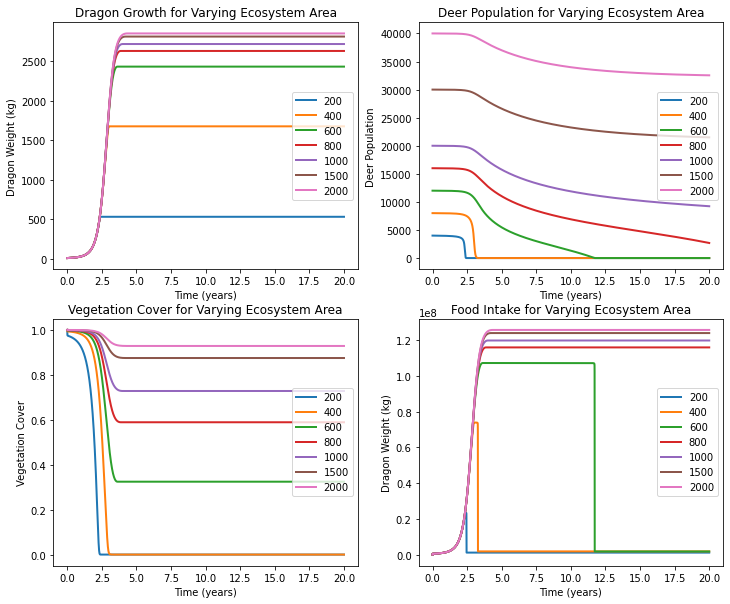

In [333]:
plt.figure(figsize=(12,10))
arearange = [200, 400, 600, 800, 1000, 1500, 2000]
for area in arearange:
  p0=area*initialdensity
  ecap=p0/v0
  initialize()
  for t in range(run_time):
      update()
      observe()

  plt.subplot(2, 2, 1)
  plot(t_list,w_result,label='{:0.0f}'.format(area),linewidth=2)
  plt.xlabel("Time (years)")
  plt.ylabel("Dragon Weight (kg)")
  legend(loc='right')
  title('Dragon Growth for Varying Ecosystem Area')
  
  plt.subplot(2, 2, 2)
  plot(t_list,p_result,label='{:0.0f}'.format(area),linewidth=2)
  plt.xlabel("Time (years)")
  plt.ylabel("Deer Population")
  legend(loc='right')
  title('Deer Population for Varying Ecosystem Area')

  plt.subplot(2, 2, 3)
  plot(t_list,v_result,label='{:0.0f}'.format(area),linewidth=2)
  plt.xlabel("Time (years)")
  plt.ylabel("Vegetation Cover")
  legend(loc='right')
  title('Vegetation Cover for Varying Ecosystem Area')

  plt.subplot(2, 2, 4)
  #plot(t_list,metabolism_result,label='{:0.0f}'.format(area),linewidth=2)
  plot(t_list,f_result,label='{:0.0f}'.format(area),linewidth=2)
  plt.xlabel("Time (years)")
  plt.ylabel("Dragon Weight (kg)")
  legend(loc='right')
  title('Food Intake for Varying Ecosystem Area')

area=2000

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes cu

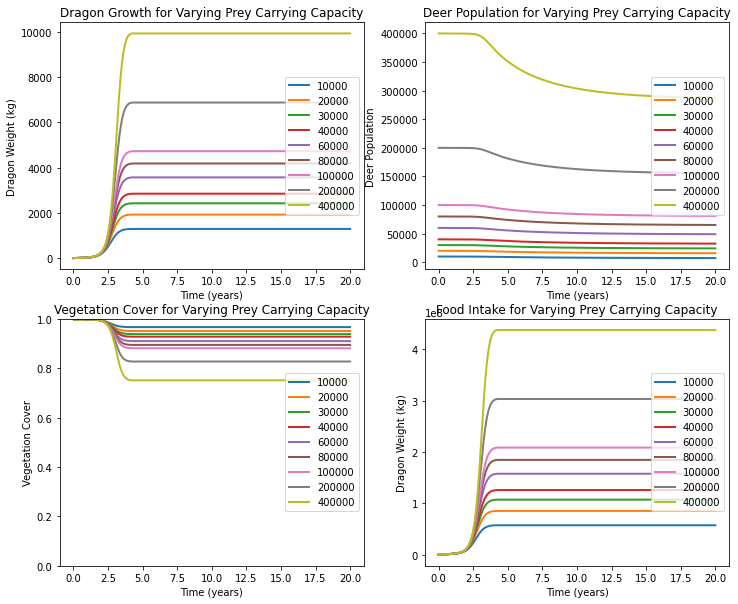

In [341]:
plt.figure(figsize=(12,10))
initialdensities = [5, 10, 15, 20, 30, 40, 50, 100,200]
for initialdensity in initialdensities:
  p0=area*initialdensity
  ecap=p0/v0
  initialize()
  for t in range(run_time):
      update()
      observe()

  plt.subplot(2, 2, 1)
  plot(t_list,w_result,label='{:0.0f}'.format(p0),linewidth=2)
  plt.xlabel("Time (years)")
  plt.ylabel("Dragon Weight (kg)")
  legend(loc='right')
  title('Dragon Growth for Varying Prey Carrying Capacity')
  
  plt.subplot(2, 2, 2)
  plot(t_list,p_result,label='{:0.0f}'.format(p0),linewidth=2)
  plt.xlabel("Time (years)")
  plt.ylabel("Deer Population")
  legend(loc='right')
  title('Deer Population for Varying Prey Carrying Capacity')

  plt.subplot(2, 2, 3)
  plot(t_list,v_result,label='{:0.0f}'.format(p0),linewidth=2)
  plt.xlabel("Time (years)")
  plt.ylabel("Vegetation Cover")
  legend(loc='right')
  plt.ylim(0)
  title('Vegetation Cover for Varying Prey Carrying Capacity')

  plt.subplot(2, 2, 4)
  #plot(t_list,metabolism_result,label='{:0.0f}'.format(area),linewidth=2)
  plot(t_list,f_result,label='{:0.0f}'.format(p0),linewidth=2)
  plt.xlabel("Time (years)")
  plt.ylabel("Dragon Weight (kg)")
  legend(loc='right')
  title('Food Intake for Varying Prey Carrying Capacity')

initialdensity=20

# Continuous ABM

In [343]:
from netCDF4 import Dataset

In [345]:
surface_temp = Dataset("air.sig995.2020.nc", 'r', format='NETCDF4')

lats = surface_temp.variables['lat'][:]
lons = surface_temp.variables['lon'][:]
time = surface_temp.variables['time'][:]
air = surface_temp.variables['air'][:]

In [347]:
def get_lon_index(x):
  return np.abs(lons - x-180).argmin()
def get_lat_index(y):
  return np.abs(lats - y).argmin()
def get_tindex(t):
  return t%365
def get_temp(t,x,y):
  return air[get_tindex(t),get_lat_index(y),get_lon_index(x)]-273.15
def get_tsuitability(t,x,y):
  season_adjust=23.5*math.cos(t/(365/2)*math.pi)
  irradiance_adjust=math.cos((y+season_adjust)*math.pi/180)
  return -((get_temp(t,x,y)+5*irradiance_adjust-30)**2)/10 #assuming 30 is the optimal temperature for a dragon

In [348]:
get_temp(30,40,5) #get temp at 30°E, 40°N on the 5th day of the year

25.349969482421898

In [349]:
get_lon_index(0)

72

In [350]:
from mpl_toolkits.basemap import Basemap
from random import shuffle, uniform
bm = Basemap()   # default: projection='cyl'
print(bm.is_land(99.675, 13.104))  #True
print(bm.is_land(100.539, 13.104))  #False

True
False


In [411]:
from global_land_mask import globe
t=0
dlist=[]
xlist=[]
ylist=[]
destruction=np.zeros_like(air[0])
print(destruction)
class dragon:
  def __init__(self):
    self.weight=10
    self.birthday=t
    self.energy=100
    self.movesum=0
    # self.x=37
    # self.y=55
    self.x=uniform(-180,180)
    self.y=uniform(-90,90)
    while(bm.is_land(self.x,self.y)==0):
      self.x=uniform(-180,180)
      self.y=uniform(-90,90)
    # print(self.x)
    # print(self.y)
    dlist.append(self)

  def get_age(self):
    return (t-self.birthday)/365

  def split(self):
    child=dragon()
    child.x=self.x
    child.y=self.y
    self.energy-=50

  def destroy(self):
    destruction[get_lat_index(self.y),get_lon_index(self.x)]+=1/10

  def get_suitability(self):
    tsuitability=get_tsuitability(t,self.x,self.y)
    return tsuitability-destruction[get_lat_index(self.y),get_lon_index(self.x)]

  #if suitability is below a certain point, will migrate
  def migrate(self):
    localsuit=get_tsuitability(t,self.x,self.y)
    suitabilities=[]
    suitabilities.append([localsuit,0,0])
    for i in [-1,1]:
      for j in [-1,1]:
        xchange=i*uniform(0,4)
        ychange=j*uniform(0,4)
        if(bm.is_land(self.x+xchange,self.y+ychange)):
          suitabilities.append([get_tsuitability(t,self.x+xchange,self.y+ychange),xchange,ychange])
    shuffle(suitabilities)
    suitabilities=np.array(suitabilities)
    #print(suitabilities)
    #print(suitabilities[:,:1])
    movex=suitabilities[suitabilities[:,:1].argmax()][1]
    movey=suitabilities[(suitabilities[:,:1].argmax())][2]
    self.x+=movex
    self.y+=movey

    self.movesum+=sqrt(movex**2+movey**2)*111

    #print("x: "+str(self.x)+"y: "+str(self.y))
    
    #use these lines to trace one dragon's path
    # xlist.append(self.x)
    # ylist.append(self.y)
    

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [377]:
def initialize():
  dlist=[]
  for i in range(0,3):
    d=dragon()
  # d=dragon()
  # d.x=37
  # d.y=55
  # d=dragon()
  # d.x=-74
  # d.y=40
  # d=dragon()
  # d.x=106
  # d.y=6
  xlist=[]
  ylist=[]

  t=0
def update():
  for d in dlist:
    d.destroy()
    # if d.get_age()>5 and d.energy>80:
    #   d.split()
    if d.get_suitability()<-0.5:
      d.migrate()

ndragons=[]
def observe():
  ndragons.append(len(dlist))

In [363]:
dlist=[]
xlist=[]
ylist=[]
destruction=np.zeros_like(air[0])
t=0
initialize()
for i in range(4000):
  update()
  observe()
  t+=1

In [364]:
# for d in dlist:
#   xlist.append(d.x)
#   ylist.append(d.y)
# print(dlist)

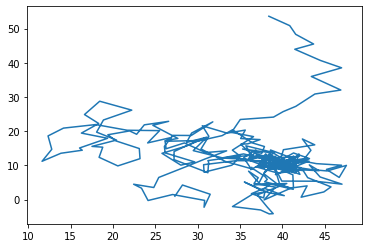

In [365]:
plot(xlist,ylist)
dlist
destruction.max()
destruction_adjust=destruction**0.3

In [366]:
shape(destruction_adjust)
ma.filled(lats)
lons

masked_array(data=[  0. ,   2.5,   5. ,   7.5,  10. ,  12.5,  15. ,  17.5,
                    20. ,  22.5,  25. ,  27.5,  30. ,  32.5,  35. ,  37.5,
                    40. ,  42.5,  45. ,  47.5,  50. ,  52.5,  55. ,  57.5,
                    60. ,  62.5,  65. ,  67.5,  70. ,  72.5,  75. ,  77.5,
                    80. ,  82.5,  85. ,  87.5,  90. ,  92.5,  95. ,  97.5,
                   100. , 102.5, 105. , 107.5, 110. , 112.5, 115. , 117.5,
                   120. , 122.5, 125. , 127.5, 130. , 132.5, 135. , 137.5,
                   140. , 142.5, 145. , 147.5, 150. , 152.5, 155. , 157.5,
                   160. , 162.5, 165. , 167.5, 170. , 172.5, 175. , 177.5,
                   180. , 182.5, 185. , 187.5, 190. , 192.5, 195. , 197.5,
                   200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5,
                   220. , 222.5, 225. , 227.5, 230. , 232.5, 235. , 237.5,
                   240. , 242.5, 245. , 247.5, 250. , 252.5, 255. , 257.5,
                   260. ,

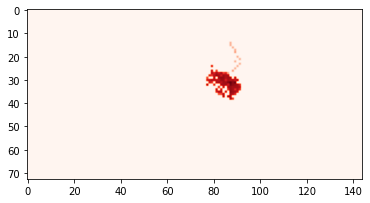

In [367]:
fig, ax = plt.subplots()
ax.imshow(destruction_adjust, cmap="Reds", origin="upper", vmin=0)
plt.show()

In [368]:
lon=np.arange(-182.5,180,2.5)
lon
lat=np.arange(90,-95,-2.5)
lat
# shape(destruction_adjust)
# np.array(destruction_adjust).T

array([ 90. ,  87.5,  85. ,  82.5,  80. ,  77.5,  75. ,  72.5,  70. ,
        67.5,  65. ,  62.5,  60. ,  57.5,  55. ,  52.5,  50. ,  47.5,
        45. ,  42.5,  40. ,  37.5,  35. ,  32.5,  30. ,  27.5,  25. ,
        22.5,  20. ,  17.5,  15. ,  12.5,  10. ,   7.5,   5. ,   2.5,
         0. ,  -2.5,  -5. ,  -7.5, -10. , -12.5, -15. , -17.5, -20. ,
       -22.5, -25. , -27.5, -30. , -32.5, -35. , -37.5, -40. , -42.5,
       -45. , -47.5, -50. , -52.5, -55. , -57.5, -60. , -62.5, -65. ,
       -67.5, -70. , -72.5, -75. , -77.5, -80. , -82.5, -85. , -87.5,
       -90. , -92.5])

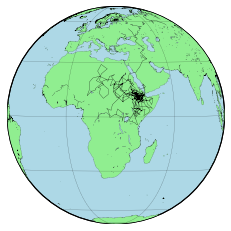

In [369]:
map=Basemap(projection='ortho',lat_0=dlist[0].y,lon_0=dlist[0].x,resolution='i')
#map.bluemarble()
map.drawcoastlines(linewidth=0.1)
map.fillcontinents(color='lightgreen',lake_color='lightblue')
map.drawmapboundary(fill_color='lightblue')
map.drawparallels(np.arange(-90.,91.,30.),linewidth=0.25)
map.drawmeridians(np.arange(-180.,181.,60.),linewidth=0.25)
mapx,mapy=map(xlist,ylist)
map.plot(mapx,mapy,color='black',zorder=5,linewidth=0.25)

# mapx,mapy=np.meshgrid(lon,lat)
# map.pcolor(mapx,mapy,np.array(destruction_adjust),cmap="viridis", vmin=0,vmax=destruction_adjust.max()*0.7)
fig=plt.gcf()
plt.show()

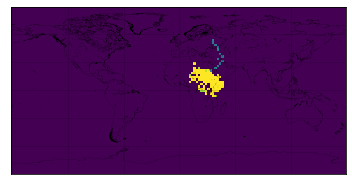

In [372]:
map=Basemap(projection='cyl',lat_0=0,lon_0=-2,resolution='i')
#map.bluemarble()
map.drawcoastlines(linewidth=0.1)
# map.fillcontinents(color='lightgreen',lake_color='lightblue')
# map.drawmapboundary(fill_color='lightblue')
map.drawparallels(np.arange(-90.,91.,30.),linewidth=0.25)
map.drawmeridians(np.arange(-180.,181.,60.),linewidth=0.25)
# mapx,mapy=map(xlist,ylist)
# map.plot(mapx,mapy,color='black',zorder=5,linewidth=0.25)

mapx,mapy=np.meshgrid(lon,lat)
map.pcolor(mapx,mapy,np.array(destruction_adjust),cmap="viridis", vmin=0,vmax=destruction_adjust.max()*0.7)
fig2=plt.gcf()
plt.show()

In [ ]:
fig.savefig('test.png',dpi=600,bbox_inches='tight')

In [402]:
moves=[]
for i in range(0,10):

  print(i)
  dlist=[]
  xlist=[]
  ylist=[]
  destruction=np.zeros_like(air[0])
  t=0
  initialize()
  for i in range(2000):
    update()
    observe()
    t+=1
    if(i==1000):
      for d in dlist:
        d.movesum=0
  for d in dlist:
    moves.append(d.movesum)

0
1
2
3
4
5
6
7
8
9


In [404]:
for d in dlist:
  print(d.y)

19.212471766307427
-11.17517594797447
30.097261552416803


In [398]:
moves_nodestruction=moves
moves_nodestruction

[0,
 11238.507151614624,
 9093.379794661581,
 18002.543976144458,
 15757.01678557336,
 48089.215257104246,
 14364.7746586112,
 0,
 7262.359290701858,
 6083.9513876969595,
 0,
 24312.350534445883,
 0,
 2945.959243208993,
 14419.748209081215,
 0,
 2384.30029077817,
 41642.62445092176,
 19324.637776378673,
 16210.400749535014,
 31231.245275368226,
 0,
 2734.4424186777915,
 0,
 17711.36300612926,
 18982.550453588752,
 0,
 2624.791263987064,
 17917.23211257684,
 0]

In [403]:
moves_destruction=moves
moves_destruction

[38478.73560126698,
 35829.02300762548,
 184170.85515406542,
 197869.07466512435,
 183961.14690329094,
 132655.10811532018,
 150381.89793661787,
 34439.616302591094,
 125009.34085889037,
 80272.11715687517,
 181058.5549241289,
 200577.56654271515,
 158267.95948875998,
 161019.60080559558,
 62336.86568188861,
 105983.33684224273,
 79353.44320524081,
 123828.09796501677,
 122141.42671218657,
 38732.96707961322,
 138247.689381155,
 39441.60700299011,
 66746.05113522749,
 177794.65193365642,
 162454.55495615894,
 118550.34182725748,
 171946.1428835724,
 85060.34218823617,
 144931.31328470376,
 129098.23760165548]

In [413]:
xlist=[]
ylist=[]
for i in range(0,10):
  print(i)
  dlist=[]
  destruction=np.zeros_like(air[0])
  t=0
  initialize()
  for i in range(2000):
    update()
    observe()
    t+=1
  for d in dlist:
    xlist.append(d.x)
    ylist.append(d.y)

0
1
2
3
4
5
6
7
8
9


In [414]:
d_xlist=xlist
d_ylist=ylist

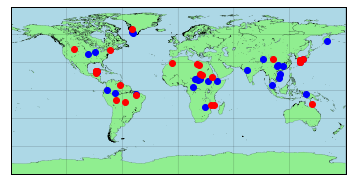

In [415]:
map=Basemap(projection='cyl',lat_0=0,lon_0=0,resolution='i')
#map.bluemarble()
map.drawcoastlines(linewidth=0.1)
map.fillcontinents(color='lightgreen',lake_color='lightblue')
map.drawmapboundary(fill_color='lightblue')
map.drawparallels(np.arange(-90.,91.,30.),linewidth=0.25)
map.drawmeridians(np.arange(-180.,181.,60.),linewidth=0.25)
mapx,mapy=map(nod_xlist,nod_ylist)
map.scatter(mapx,mapy,color='blue',zorder=5)
mapx,mapy=map(d_xlist,d_ylist)
map.scatter(mapx,mapy,color='red',zorder=5)

# mapx,mapy=np.meshgrid(lon,lat)
# map.pcolor(mapx,mapy,np.array(destruction_adjust),cmap="viridis", vmin=0,vmax=destruction_adjust.max()*0.7)
fig=plt.gcf()
plt.show()

In [416]:
fig.savefig('g_final.png',dpi=600,bbox_inches='tight')

In [2]:
str(1)+"3"

'13'

In [410]:
nod_xlist=xlist
nod_ylist=ylist

In [ ]:
math.cos(180/(365/2)*math.pi)

-0.99907411510223

# Stochastic Model

In [ ]:
import random

dragons = []
locations = []
moves = [-11, -10, -9, -1, 0, 1, 9, 10, 11 ]
moves_possible = []
t = 0
dragon_number = 0

class dragon:

  def __init__(self, x):
    dragons.append(self)
    self.location = x
    locations.append(self.location)
    self.birthday = t
    self.number = dragon_number
    dragon_number++

  def get_age(self):
    return (t-self.birthday)/365

  def mate(self):
    child = dragon(location)
    dragons.append(child)
    locations.append(self.location)

  def move(self):
    for i in moves:
      if i<=-9 and (i+self.location)//10 != self.location/10:
        moves_possible.append(i)
      elif i<=-1 and (i+self.location)//10 == self.location/10:
        moves_possible.append(i)
      elif i<=11 and (i+self.location)//10 != self.location/10:
        moves_possible.append(i)

    self.location += moves_possible[random.randint(0, moves_possible.len())]
    moves_possible = []

    location[self.number] = self.location
    
  

In [ ]:
def initialize():
  locations = []
  dragons = []
  t=0
  dragon(random.randint(0,99))
  dragon(random.randint(0,99))
  dragon(random.randint(0,99))

initialize()
print(locations)
for i in dragons:
  dragon.move(i)
print(locations)
  

[26, 73, 7, 39, 83, 54]


AttributeError: ignored